# Import libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)


# Loading Data

In [2]:
data = pd.read_csv('./dataset/marketing_campaign.csv', sep='\t')

print('Number of datapoints', len(data))
data.head()


Number of datapoints 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Dataset Attributes Information

**Customer Information**

    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products Spending**

    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years

**Marketing Campaigns**

    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Purchase Channels**

    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s website in the last month

**Cost and Revenue**

    - Z_CostContact: represents the cost incurred by the company for each customer contact.
    - Z_Revenue: denotes the revenue generated by the company from each successful customer contact.

# Data Cleaning

- data cleaning 
- Features Engineering

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data.dropna()
print('After removing missing values:', len(data))

After removing missing values: 2240


In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [7]:
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [9]:
# Creating a feature ("Customer_For") of the number of days the customers 
# started to shop in the store relative to the last recorded date
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [10]:
print('Total categorical in the feature Marital_Status:\n', data['Marital_Status'].value_counts(), '\n')
print('Total categorical in the feature Education:\n', data['Education'].value_counts())


Total categorical in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categorical in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


**Feature  Engineering**

In [11]:
# Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
#Age of customer today 
data['Age'] = 2023-data['Year_Birth']

In [12]:
# Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
#Total spendings on various items
data['Spent'] = data['MntWines'] + data['MntFruits']+ data['MntMeatProducts']+ data['MntFishProducts']+data['MntSweetProducts']+ data['MntGoldProds']


In [13]:
# Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
#Deriving living situation by marital status"Alone"
data['Living_With'] = data['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Absurd': 'Alone','Widow': 'Alone','YOLO': 'Alone','Divorced': 'Alone','Single': 'Alone',})

In [14]:
#Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
#Feature indicating total children living in the household
data['Children'] = data['Kidhome']+data['Teenhome']

In [15]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [16]:
# To get further clarity of household, Creating feature indicating "Family_Size"
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [17]:
#Create a feature "Is_Parent" to indicate parenthood status
#Feature pertaining parenthood
data['Is_Parent'] = np.where(data.Children > 0, 1,0)

In [18]:
# create three categories in the "Education" by simplifying its value counts.
#Segmenting education levels in three groups
data['Education'] = data['Education'].replace({'Basic': 'Undegraduate', '2n Cycle': 'Undegraduate', 'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'})

In [19]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [20]:
#Dropping some of the redundant features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [21]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,32918400000000000,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1641600000000000,77,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,13392000000000000,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,13478400000000000,67,843,Partner,1,3,1


In [22]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,3.054950e+16,54.194196,605.798214,0.950446,2.595089,0.715179
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,1.746339e+16,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.561680e+16,46.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,53.000000,396.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,64.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


**Visualizing Data**

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

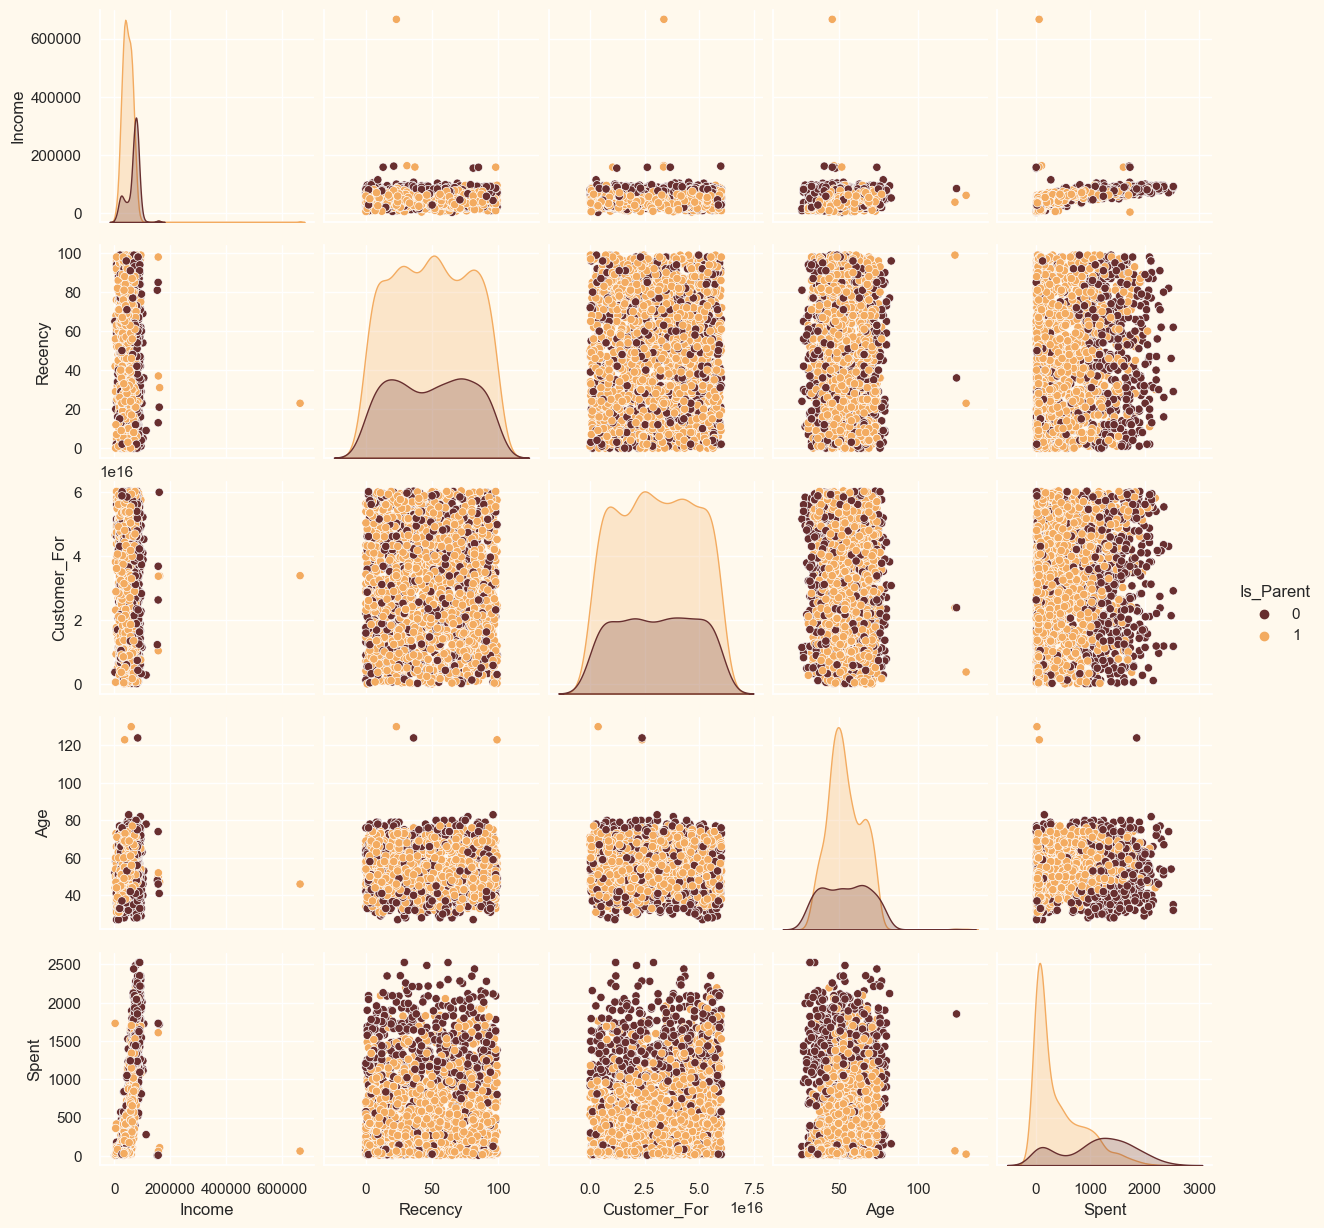

In [23]:
sns.set(rc={'axes.facecolor': '#FFF9ED', 'figure.facecolor':'#FFF9ED'})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#plotting
To_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']
print("Reletive Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(data[To_plot], hue='Is_Parent', palette=(["#682F2F","#F3AB60"]))
plt.show()

**Dropping the outliers**

In [25]:
data = data[(data['Age']< 90)]
data = data[data['Income']< 600000]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


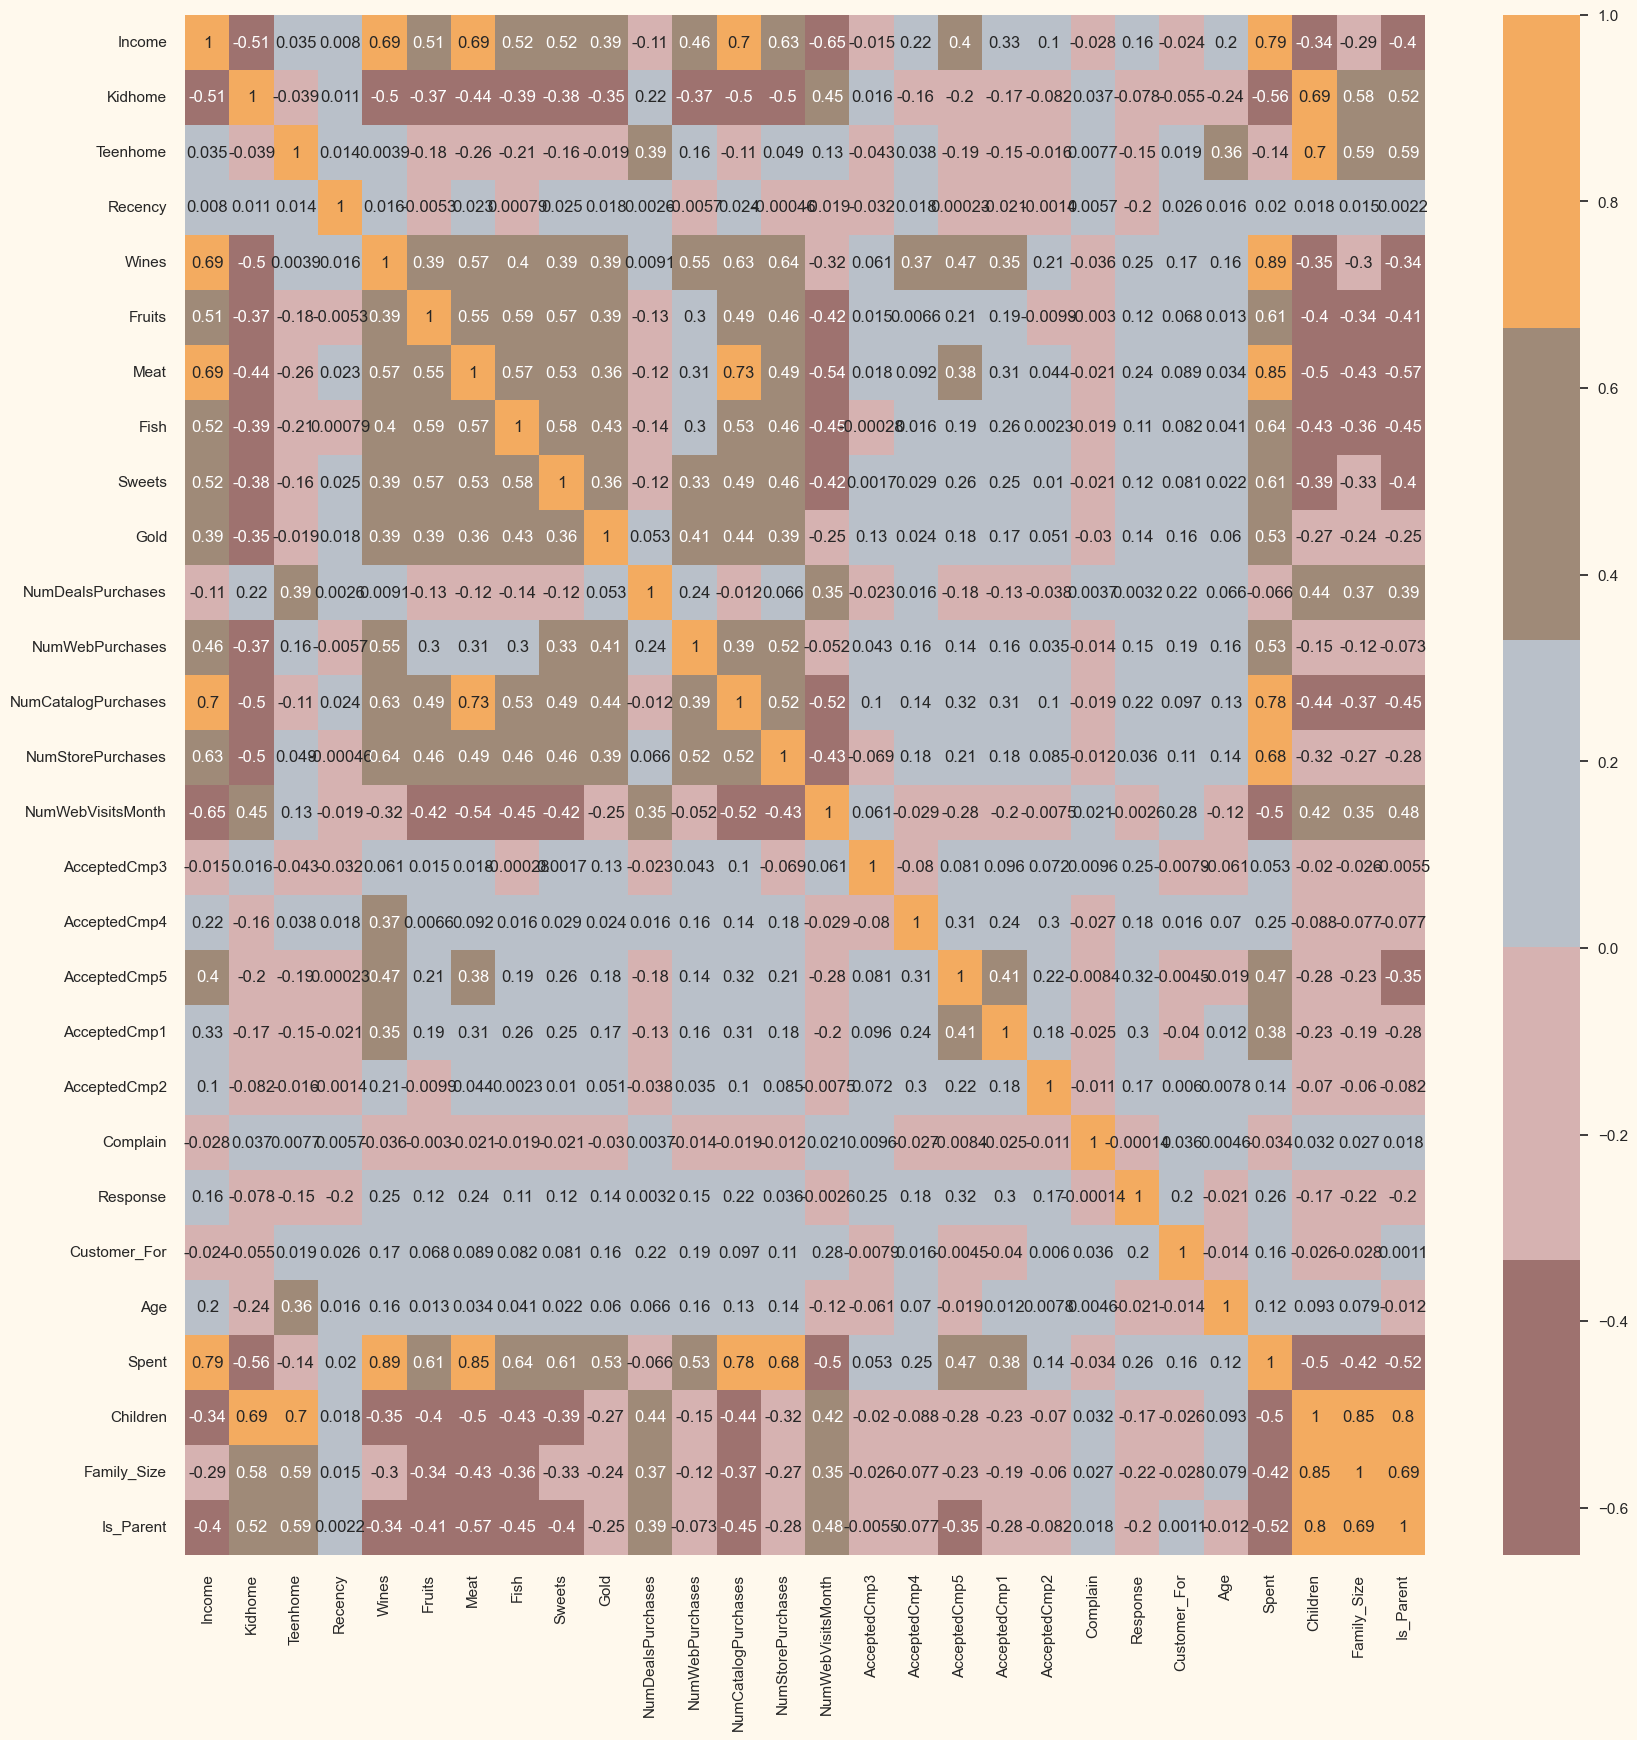

In [26]:
#correlation matrix

numeric_data = data.select_dtypes(include=['number'])
cormat = numeric_data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(cormat, annot=True, cmap=cmap, center=0)
plt.show()

# Data Preprocessing

In [28]:
#Get List of categorical variables

s=(data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:",object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [29]:
#Label Encoding the object dtypes.
LE = LabelEncoder()

for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [30]:
#creating a copy of data
ds = data.copy()
#creating a subset of datafrae by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

**scaling**

In [31]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("ALL feature are now scaled")

ALL feature are now scaled


In [32]:
#Scaled Data to be used for reducing dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# Dimensionality Reduction (PCA)

In [33]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,6.424437e-18,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,-1.927331e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,8.472226e-17,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


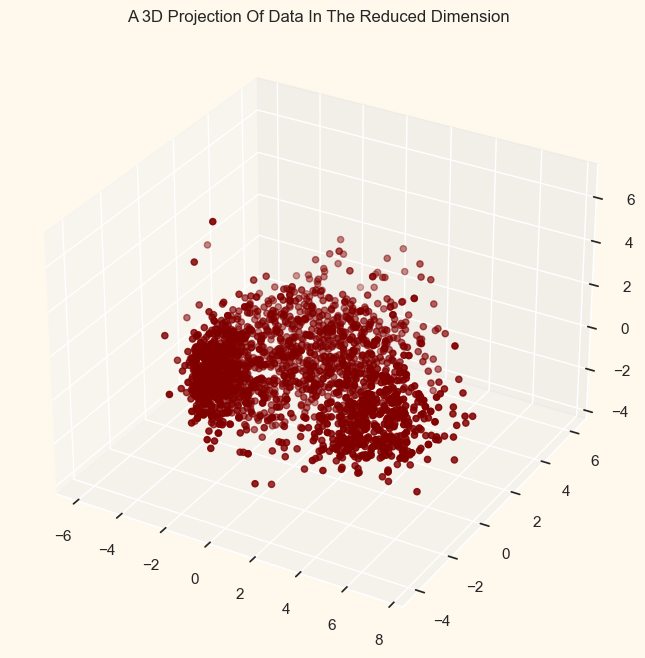

In [34]:
#A 3D Projection of data in the Reduced Dimension
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

#plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c= 'maroon', marker='o')
ax.set_title('A 3D Projection Of Data In The Reduced Dimension')
plt.show()

# Clustering

Elbow Method to determine the number of clusters to be formed:


  File "c:\Users\B\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


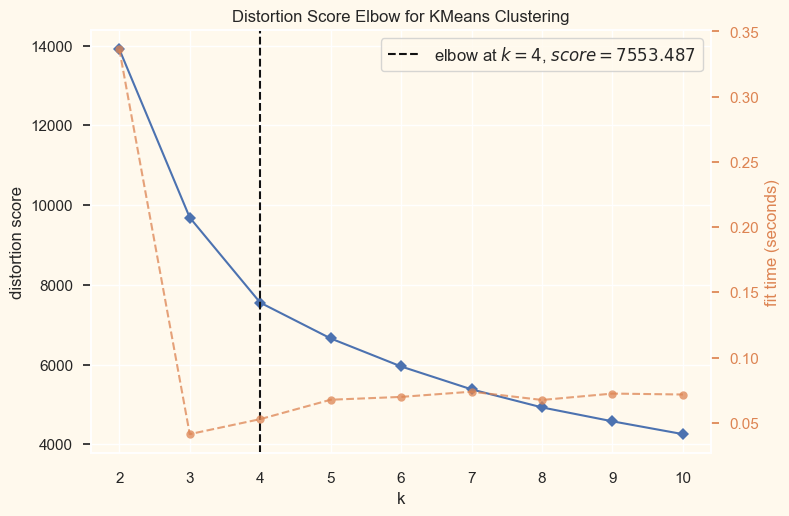

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [36]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC= AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] = yhat_AC
data['Clusters'] = yhat_AC

In [37]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,66,1617,0,0,1,0,2
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,69,27,0,2,3,1,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,58,776,1,0,2,0,2
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,39,53,1,1,3,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,42,422,1,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,0,0,32918400000000000,56,1341,1,1,3,1,0
2236,1,64014.0,2,1,56,406,0,30,0,0,...,0,0,1641600000000000,77,444,1,3,5,1,3
2237,0,56981.0,0,0,91,908,48,217,32,12,...,0,0,13392000000000000,42,1241,0,0,1,0,2
2238,1,69245.0,0,1,8,428,30,214,80,30,...,0,0,13478400000000000,67,843,1,1,3,1,0


**Plotting the clusters**

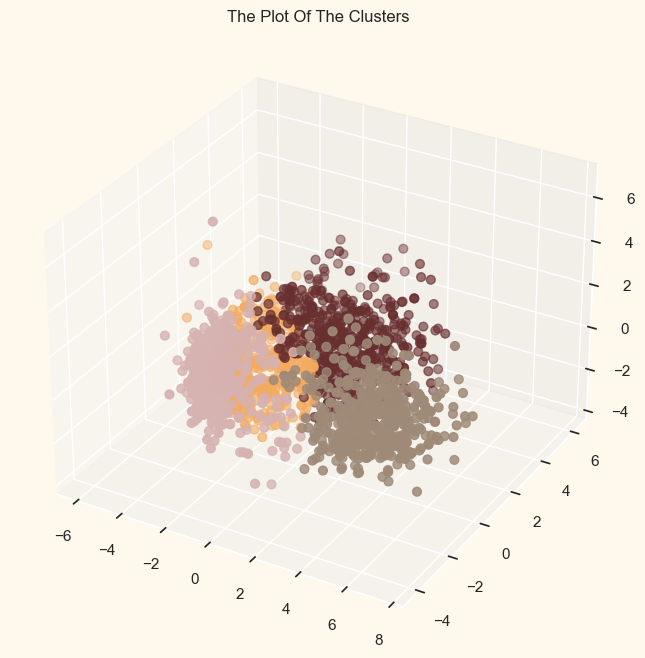

In [38]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x,y,z, s=40, c=PCA_ds['Clusters'], marker='o', cmap=cmap)
ax.set_title('The Plot Of The Clusters')
plt.show()

# Evaluation

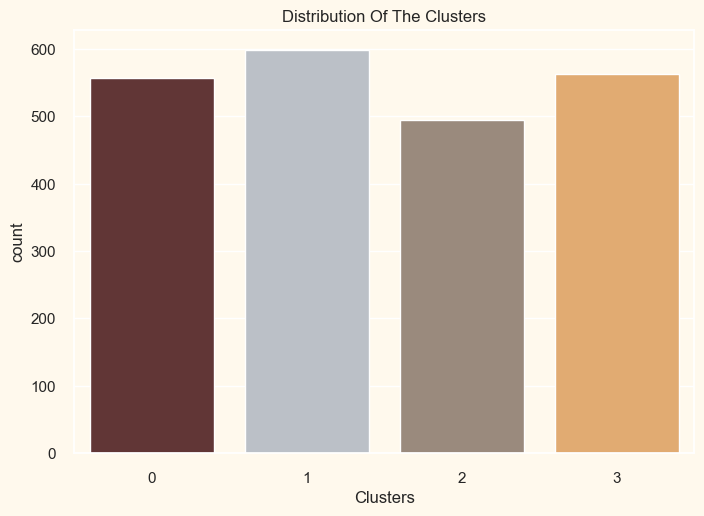

In [39]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data['Clusters'], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

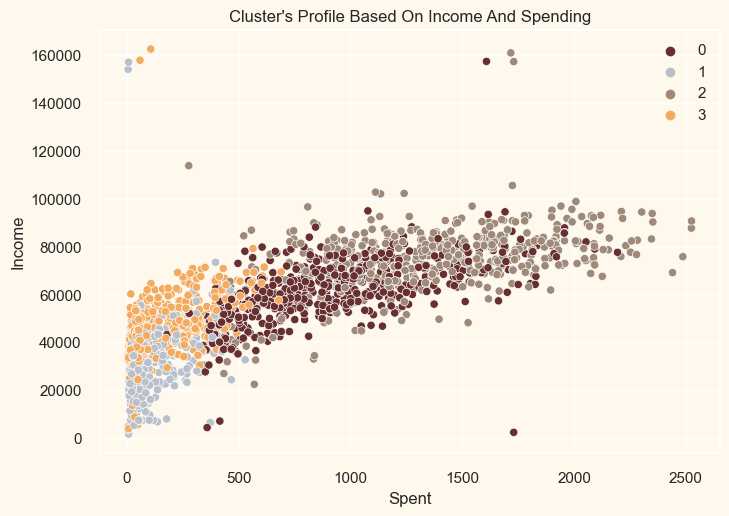

In [40]:
pl = sns.scatterplot(data= data, x=data['Spent'], y = data['Income'], hue=data['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

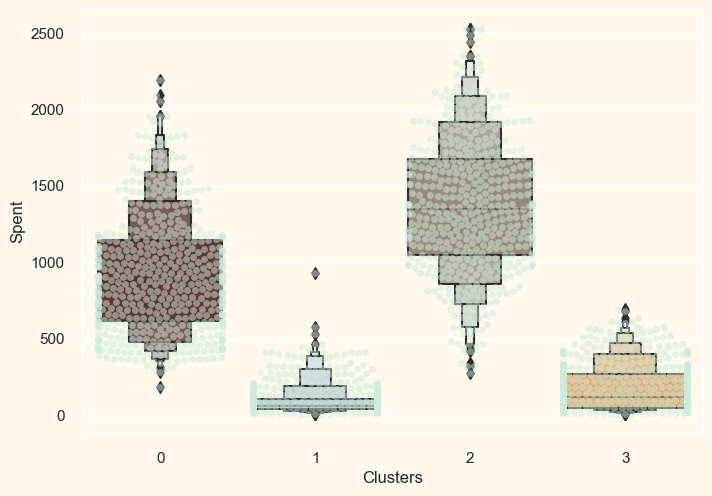

In [41]:
plt.figure()
pl = sns.swarmplot(x = data['Clusters'], y = data['Spent'], color='#CBEDDD', alpha=0.5 )
pl = sns.boxenplot(x= data['Clusters'], y = data['Spent'], palette=pal)
plt.show()

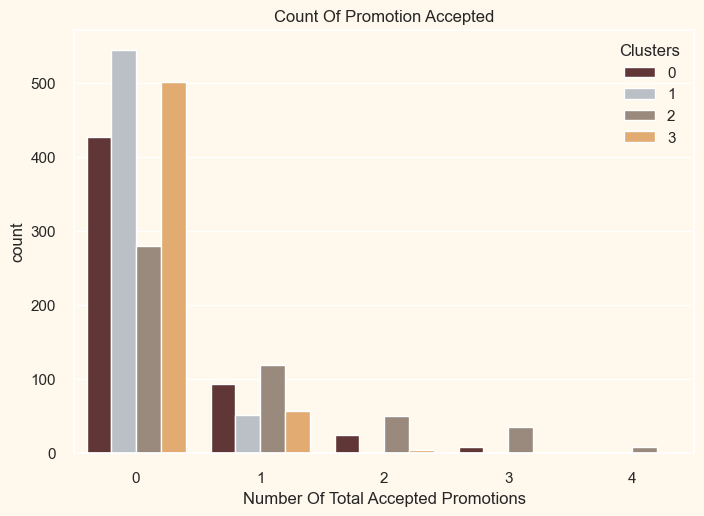

In [42]:
#Creating a feature to get a sum of accepted promotions 
data['Total_Promos'] = data['AcceptedCmp1']+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x = data['Total_Promos'], hue=data['Clusters'], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

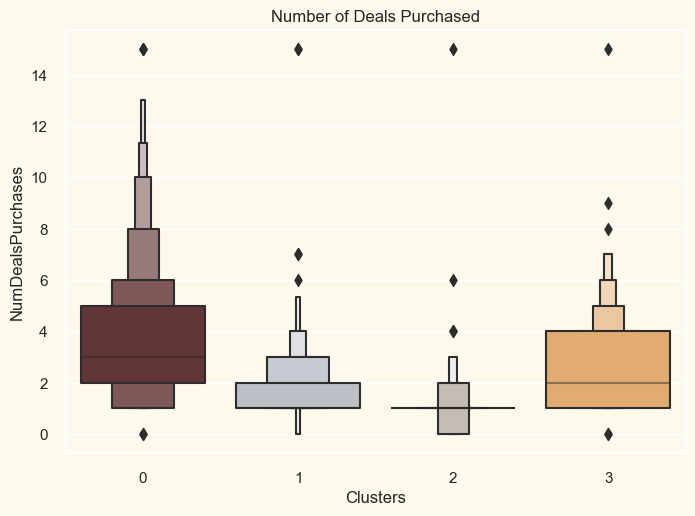

In [43]:
#Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y = data['NumDealsPurchases'], x = data['Clusters'], palette=pal)
pl.set_title("Number of Deals Purchased")
plt.show()